In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pytrends.request import TrendReq

columns = ['City', 'Big Data Job Offers', 'Data Science Job Offers', 'Machine Learning Job Offers']
europe_cities = {}
latam_cities = {}
usa_cities = {}

In [2]:
req1 = TrendReq()
req1.build_payload(kw_list=['big data', 'data science', 'machine learning'])

trends = req1.interest_by_region('CITY')
trendy = trends.drop(trends[(trends['big data'] == 0) & (trends['data science'] == 0) & (trends['machine learning'] == 0)].index)
trendy.sort_index()

,big data,data science,machine learning
geoName,,,
Bangkok,57,18,25
Barcelona,66,11,23
Bengaluru,44,20,36
Berlin,45,17,38
Chennai,55,17,28
Chicago,35,32,33
Diadema,71,11,18
Gurgaon,47,20,33
Howrah,55,19,26


In [3]:
trends.drop(trends[(trends['big data'] != 0) & (trends['data science'] != 0) & (trends['machine learning'] != 0)].index).sort_index()

,big data,data science,machine learning
geoName,,,
Ahmedabad,0,0,0
Amsterdam,0,0,0
Atlanta,0,0,0
Austin,0,0,0
Belo Horizonte,0,0,0
Bogotá,0,0,0
Boston,0,0,0
Brisbane,0,0,0
Brussels,0,0,0


In [4]:
def buildDic(dic, filename):
    f = open(filename, 'r')
    for line in f:
        data = line.strip().split(",")
        city = data[0]
        job_offer = data[1]
        total_count = int(data[2])
        if city not in dic:
            dic[city] = {}
        dic[city][job_offer] = total_count

In [5]:
buildDic(europe_cities,"europe.csv")
buildDic(latam_cities, "latinAmerica.csv")
buildDic(usa_cities,"usa.csv")

In [6]:
def addRows(df, dic):
    for k, v in dic.items():
        df2 = pd.DataFrame(data=[[k, v['Big Data'], v['Data Science'], v['Machine Learning']]], columns=columns)
        df = df.append(df2, ignore_index=True)
    df.index = [(i+1) for i in range(len(dic))]
    return df

In [7]:
def total(df):
    df['Total New Tech Job Offers'] = df.apply(lambda x: x[columns[1]] + x[columns[2]] + x[columns[3]], axis=1)

In [8]:
maindf = pd.DataFrame(columns=columns)

In [9]:
europedf = pd.DataFrame(columns=columns)
europedf = addRows(europedf, europe_cities)

In [10]:
usadf = pd.DataFrame(columns=columns)
usadf = addRows(usadf, usa_cities)

In [11]:
latamdf = pd.DataFrame(columns=columns)
latamdf = addRows(latamdf, latam_cities)

In [12]:
maindf = maindf.append([europedf, usadf, latamdf], ignore_index=True)
maindf = maindf.sort_values('City')
maindf = maindf.reset_index(drop=True)
total(maindf)

In [13]:
maindf

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers
0,Amsterdam,1291,1211,494,2996
1,Atlanta,1599,265,371,2235
2,Austin,938,349,517,1804
3,Barcelona,417,334,158,909
4,Belo Horizonte,12,8,11,31
5,Berlin,1022,982,688,2692
6,Bogota,41,51,11,103
7,Boston,2234,6702,1271,10207
8,Bruselas,649,860,196,1705
9,Budapest,302,372,81,755


In [14]:
total(europedf)
total(latamdf)
total(usadf)

In [15]:
europedf

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers
1,Amsterdam,1291,1211,494,2996
2,Barcelona,417,334,158,909
3,Berlin,1022,982,688,2692
4,Bruselas,649,860,196,1705
5,Budapest,302,372,81,755
6,Dublin,617,1184,259,2060
7,Estambul,90,152,39,281
8,Estocolmo,364,394,217,975
9,Frankfurt,472,355,170,997
10,Hamburgo,324,280,182,786


In [16]:
latamdf

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers
1,Belo Horizonte,12,8,11,31
2,Bogota,41,51,11,103
3,Buenos Aires,172,167,178,517
4,Lima,25,19,20,64
5,Mexico City,195,226,60,481
6,Santiago,102,61,49,212
7,Sao Paulo,274,295,112,681


In [17]:
usadf

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers
1,Atlanta,1599,265,371,2235
2,Austin,938,349,517,1804
3,Boston,2234,6702,1271,10207
4,Chicago,2045,333,640,3018
5,Dallas,1596,225,454,2275
6,Houston,674,98,269,1041
7,Los Angeles,1592,306,597,2495
8,New York,5397,10074,2196,17667
9,San Francisco,3867,7657,2314,13838
10,Seattle,3593,853,3153,7599


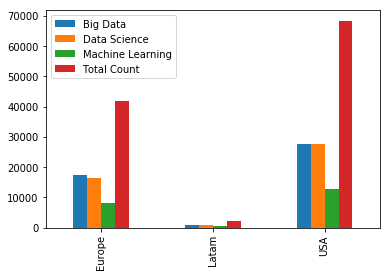

In [18]:
compdf = pd.DataFrame(index=['Europe','Latam','USA'], columns=['Big Data','Data Science','Machine Learning','Total Count'])
compdf.loc['Europe'] = [europedf[columns[1]].sum(),europedf[columns[2]].sum(),europedf[columns[3]].sum(),europedf.iloc[:,-1].sum()]
compdf.loc['Latam'] = [latamdf[columns[1]].sum(),latamdf[columns[2]].sum(),latamdf[columns[3]].sum(),latamdf.iloc[:,-1].sum()]
compdf.loc['USA'] = [usadf[columns[1]].sum(),usadf[columns[2]].sum(),usadf[columns[3]].sum(),usadf.iloc[:,-1].sum()]
compdf.plot.bar()

In [19]:
gdp_df = pd.read_csv('data/cities_gdp.csv')

In [20]:
gdp_df = gdp_df.drop(columns=['METRO_ID','Variables','TIME','Unit Code','Unit','PowerCode Code','PowerCode','Reference Period Code','Reference Period','Flag Codes','Flags'])
gdp_df = gdp_df.sort_values(by='Metropolitan areas')
gdp_df.columns = ['City','GDP']

In [31]:
gdp_df.head()

,City,GDP
0,Aachen,19496.51
1,Acapulco de Juárez,6125.81
2,Adelaide,47478.78
3,Aguascalientes,15768.23
4,Akron,24969.01


In [22]:
gdp_df = gdp_df.loc[(gdp_df['VAR'] == 'GDP') & (gdp_df['Year'] == 2012)]
gdp_df = gdp_df.reset_index(drop=True)
gdp_df = gdp_df.drop(columns=['VAR','Year'])

In [40]:
merge = pd.merge(maindf, gdp_df, how='inner', on='City')

In [38]:
merge = pd.merge(maindf, gdp_df, how='outer', on='City')
merge = merge[merge['Big Data Job Offers'] != 'NaN']

In [41]:
merge

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers,GDP
0,Amsterdam,1291,1211,494,2996,121289.27
1,Atlanta,1599,265,371,2235,263711.72
2,Austin,938,349,517,1804,96379.31
3,Barcelona,417,334,158,909,135803.15
4,Berlin,1022,982,688,2692,165376.72
5,Boston,2234,6702,1271,10207,305833.34
6,Budapest,302,372,81,755,102939.82
7,Chicago,2045,333,640,3018,554230.82
8,Dallas,1596,225,454,2275,304270.25
9,Dublin,617,1184,259,2060,95902.65


In [42]:
merge['Total New Tech Job Offers'].corr(merge['GDP'])

0.679559548960563

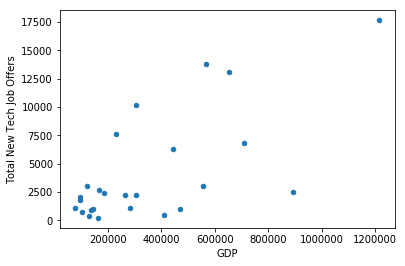

In [49]:
merge.plot.scatter(x='GDP',y='Total New Tech Job Offers')